In [26]:
import pandas as pd
from sklearn.cluster import KMeans  
from collections import Counter
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_excel('E:\Machine Learning\HW3\Wine.xlsx')

In [3]:
y=data['Class']

In [4]:
X = data.drop('Class',axis=1)

In [22]:
kmeans=KMeans(n_clusters=3,random_state=4,n_init=100)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
    random_state=4, tol=0.0001, verbose=0)

In [124]:
yp=kmeans.labels_
order=[[1,2,0],[1,0,2],[2,1,0],[2,0,1],[0,1,2],[0,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y)):
        if y[i]==1 and yp[i]==k[0]:
            accurate=accurate+1/len(y)
        elif y[i]==2 and yp[i]==k[1]:
            accurate=accurate+1/len(y)
        elif y[i]==3 and yp[i]==k[2]:
            accurate+=1/len(y)
    if accurate>finalacc:
        finalacc=accurate
        index=k
    accurate=0
print('finalacc:',finalacc)
print('index:',index)

finalacc: 0.7022471910112373
index: [1, 0, 2]


In [28]:
X2=StandardScaler().fit_transform(X)

C:\Users\huimi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\huimi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
kmeans2=KMeans(n_clusters=3,random_state=4,n_init=100)
kmeans2.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
    random_state=4, tol=0.0001, verbose=0)

In [125]:
yp2=kmeans2.labels_
order=[[1,2,0],[1,0,2],[2,1,0],[2,0,1],[0,1,2],[0,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y)):
        if y[i]==1 and yp2[i]==k[0]:
            accurate=accurate+1/len(y)
        elif y[i]==2 and yp2[i]==k[1]:
            accurate=accurate+1/len(y)
        elif y[i]==3 and yp2[i]==k[2]:
            accurate+=1/len(y)
    if accurate>finalacc:
        finalacc=accurate
        index=k
    accurate=0
print('finalacc:',finalacc)
print('index:',index)

finalacc: 0.9662921348314627
index: [2, 1, 0]


In [127]:
EM=GaussianMixture(n_components=3)
EM.fit(X2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [128]:
y_EMp=EM.predict(X2)
order=[[1,2,0],[1,0,2],[2,1,0],[2,0,1],[0,1,2],[0,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y)):
        if y[i]==1 and y_EMp[i]==k[0]:
            accurate=accurate+1/len(y)
        elif y[i]==2 and y_EMp[i]==k[1]:
            accurate=accurate+1/len(y)
        elif y[i]==3 and y_EMp[i]==k[2]:
            accurate+=1/len(y)
    if accurate>finalacc:
        finalacc=accurate
        index=k
    accurate=0
print('finalacc:',finalacc)
print('index:',index)

finalacc: 0.9662921348314627
index: [0, 1, 2]


In [53]:
X2.mean(axis=0)

array([-8.38280756e-16, -1.19754394e-16, -8.37033314e-16, -3.99181312e-17,
       -3.99181312e-17,  0.00000000e+00, -3.99181312e-16,  3.59263181e-16,
       -1.19754394e-16,  2.49488320e-17,  1.99590656e-16,  3.19345050e-16,
       -1.59672525e-16])

In [54]:
X2[yp2==0].mean(axis=0)

array([ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
       -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
       -1.16478865, -1.29241163, -0.40708796])

In [56]:
X2[yp2==1].mean(axis=0)

array([-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
       -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
        0.46180361,  0.27076419, -0.75384618])

In [57]:
X2[yp2==2].mean(axis=0)

array([ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
        0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
        0.47398365,  0.77924711,  1.12518529])

In [103]:
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(X2)
principalDf=pd.DataFrame(data=principalComponents, columns=
                        ['pc1','pc2'])

In [104]:
finalDf=pd.concat([principalDf,y],axis=1)

In [50]:
finalDf.head()

,pc1,pc2,Class
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


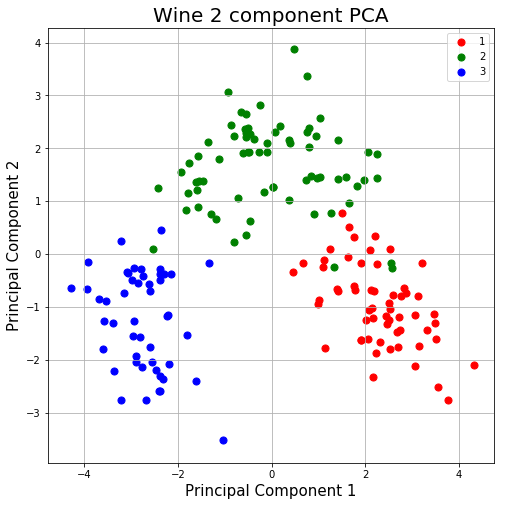

In [105]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Wine 2 component PCA', fontsize = 20)
targets = [1, 2,3]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/PCA_wine.png')

In [87]:
kmeans_pc=KMeans(n_clusters=3,random_state=3,n_init=100)
kmeans_pc.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [ ]:
    count=0
    for i in range(len(y)):
        if y[i]==1 and yp_pc[i]==2:
            count=count+1/len(y)
        elif y[i]==2 and yp_pc[i]==0:
            count=count+1/len(y)
        elif y[i]==3 and yp_pc[i]==1:
            count=count+1/len(y)
    count

In [123]:
yp_pc=kmeans_pc.labels_
order=[[1,2,0],[1,0,2],[2,1,0],[2,0,1],[0,1,2],[0,2,1]]
accurate=0
finalacc=0
for k in range(1):
    for i in range(len(y)):
        if y[i]==1 and yp_pc[i]==2:
            accurate=accurate+1/len(y)
        elif y[i]==2 and yp_pc[i]==0:
            accurate=accurate+1/len(y)
        elif y[i]==3 and yp_pc[i]==1:
            accurate+=1/len(y)
    if accurate>finalacc:
        finalacc=accurate
        index=k
    accurate=0
print('finalacc:',finalacc)
print('index:',index)

finalacc: 0.9662921348314627
index: 0


In [91]:
YP=pd.DataFrame(data=yp_pc, columns=
                        ['pre_label'])
predDf=pd.concat([principalDf,YP],axis=1)

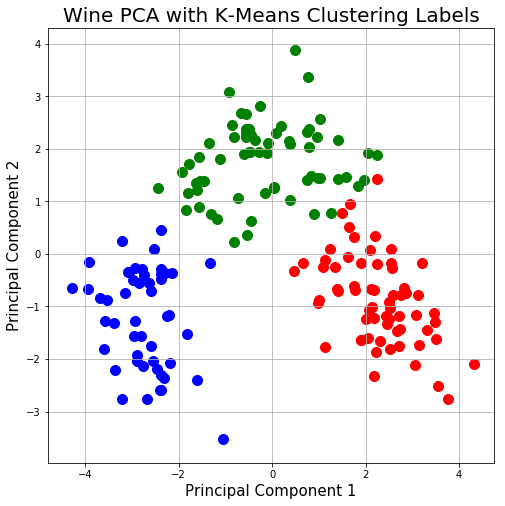

In [94]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Wine PCA with K-Means Clustering Labels', fontsize = 20)
targets = [2,0,1]
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'pc1']
               , predDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 100)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2PCA_kclustering_wine.png')

In [99]:
EM_pc=GaussianMixture(n_components=3,n_init=10,random_state=2)
EM_pc.fit(principalDf)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=2, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [101]:
ypc_EMp=EM_pc.predict(principalDf)
order=[[1,2,0],[1,0,2],[2,1,0],[2,0,1],[0,1,2],[0,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y)):
        if y[i]==1 and ypc_EMp[i]==k[0]:
            accuate=accurate+1/len(y)
        elif y[i]==2 and ypc_EMp[i]==k[1]:
            accurate=accurate+1/len(y)
        elif y[i]==3 and ypc_EMp[i]==k[2]:
            accurate+=1/len(y)
    if accurate>finalacc:
        finalacc=accurate
        index=k
    accurate=0
print('finalacc:',finalacc)
print('index:',index)

finalacc: 0.6348314606741585
index: [1, 0, 2]


In [ ]:
YP=pd.DataFrame(data=ypc_EMp, columns=
                        ['pre_label'])
predDf=pd.concat([principalDf,YP],axis=1)

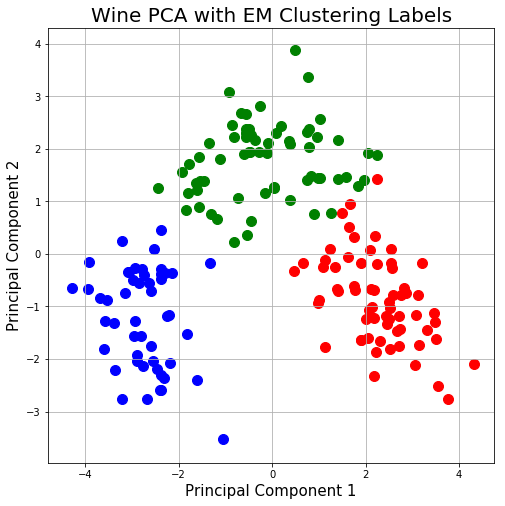

In [106]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Wine PCA with EM Clustering Labels', fontsize = 20)
targets = [2,0,1]
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'pc1']
               , predDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 100)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2PCA_EMclustering_wine.png')

In [76]:
Z=[]

In [79]:
for i in range(1,14):
    Z.append([i,X2[y_EMp==2].mean(axis=0)[i-1],2])

In [80]:
Zframe=pd.DataFrame(data=Z, columns=
                        ['features','mean','clustering'])

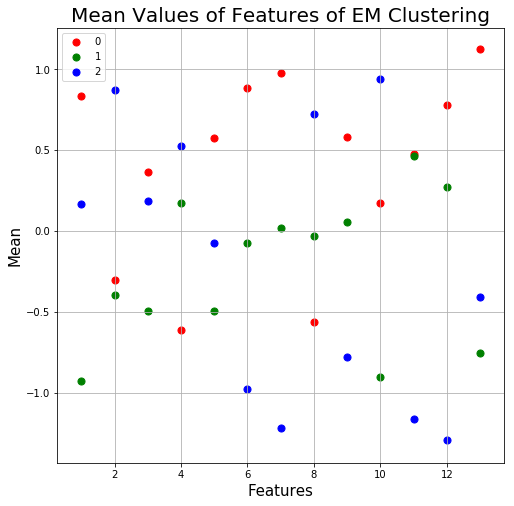

In [82]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Features', fontsize = 15)
ax.set_ylabel('Mean', fontsize = 15)
ax.set_title('Mean Values of Features of EM Clustering', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = Zframe['clustering'] == target
    ax.scatter(Zframe.loc[indicesToKeep, 'features']
               , Zframe.loc[indicesToKeep, 'mean']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/mean values EM.png')

In [108]:
Counter(y)

Counter({1: 59, 2: 71, 3: 48})

In [111]:
Counter(yp_pc)

Counter({2: 64, 0: 65, 1: 49})

In [121]:
    count=0
    for i in range(len(y)):
        if y[i]==1 and yp_pc[i]==2:
            count=count+1/len(y)
        elif y[i]==2 and yp_pc[i]==0:
            count=count+1/len(y)
        elif y[i]==3 and yp_pc[i]==1:
            count=count+1/len(y)
    count


0.9662921348314627

In [116]:
(59+65+48)/len(y)

0.9662921348314607

In [117]:
Counter(yp2)

Counter({2: 62, 1: 65, 0: 51})